# Churn Prediction

## Import packages and data

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', 500) # show all variables

%matplotlib inline
sns.set(style="white", context="notebook", palette='deep')

In [153]:
data = pd.read_csv('telco.csv', sep = ',')

## Exploratory data analysis

### Data structure

In [154]:
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat,churn
0,2,13,44,1,9,64.0,4,5,0.0,0,2,0,0,1,0,3.70,0.00,0.0,7.50,0.0,37.45,0.00,0.0,110.0,0.00,0,0,0,0,0,0,1,0,0,1,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,1,0,1,1,4.40,20.75,0.0,15.25,35.7,42.00,211.45,0.0,125.0,380.35,0,1,1,0,1,1,1,1,0,4,1
2,3,68,52,1,24,116.0,1,29,0.0,1,2,1,0,1,0,18.15,18.00,0.0,30.25,0.0,1300.60,1247.20,0.0,2150.0,0.00,0,0,0,0,1,1,0,1,0,3,0
3,2,33,33,0,12,33.0,2,0,0.0,1,1,0,0,0,0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,0,0,0,0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.00,0,0,0,0,1,0,1,1,0,3,0


In [155]:
# type of each field in the dataset
field_type = data.dtypes.to_frame()
field_type.columns = ['type']
field_type

,type
region,int64
tenure,int64
age,int64
marital,int64
address,int64
income,float64
ed,int64
employ,int64
retire,float64
gender,int64


All the variables are integers or floats, therefore categorical variables are coded as well.

In [156]:
data.shape
# shape of dataframe: 1000 rows and 36 columns

(1000, 36)

In [164]:
data.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat,churn
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,3.957203,2.671000,10.987000,0.047000,0.517000,2.331000,0.474000,0.386000,0.678000,0.296000,11.723100,13.274000,14.219800,13.781000,11.583900,574.050050,551.258500,465.632850,605.773750,442.736900,0.475000,0.304000,0.2610,0.368000,0.481000,0.485000,0.493000,0.502000,0.371000,2.487000,0.274000
std,0.8162,21.359812,12.558816,0.500225,10.086681,0.803754,1.222397,10.082087,0.211745,0.499961,1.435793,0.499573,0.487074,0.467477,0.456719,10.363486,16.902122,19.068539,14.084496,19.719426,789.974346,915.746733,857.273071,830.126069,971.471264,0.499624,0.460213,0.4394,0.482503,0.499889,0.500025,0.500201,0.500246,0.483314,1.120306,0.446232
min,1.0000,1.000000,18.000000,0.000000,0.000000,2.197225,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,3.367296,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.200000,0.000000,0.000000,0.000000,0.000000,90.137500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,3.850148,3.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,8.525000,0.000000,0.000000,12.000000,0.000000,285.475000,0.000000,0.000000,332.500000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,4.418841,4.000000,17.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,14.412500,24.250000,31.475000,20.500000,24.712500,755.025000,846.900000,579.450000,910.000000,316.500000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,7.419381,5.000000,47.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,99.950000,173.000000,77.700000,109.250000,111.950000,7257.600000,5916.000000,5028.650000,7515.000000,7856.850000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Target variable

Check the distrubition of the target variable first:

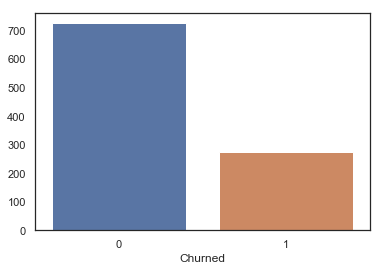

In [158]:
sns.countplot(x = 'churn', data = data).set(xlabel = 'Churned', ylabel ='');


The classes are inbalanced (as usual in similar problems), though the cardinlaity of the group '1' (the clients who have churned) is not very small.

### Numerical variables

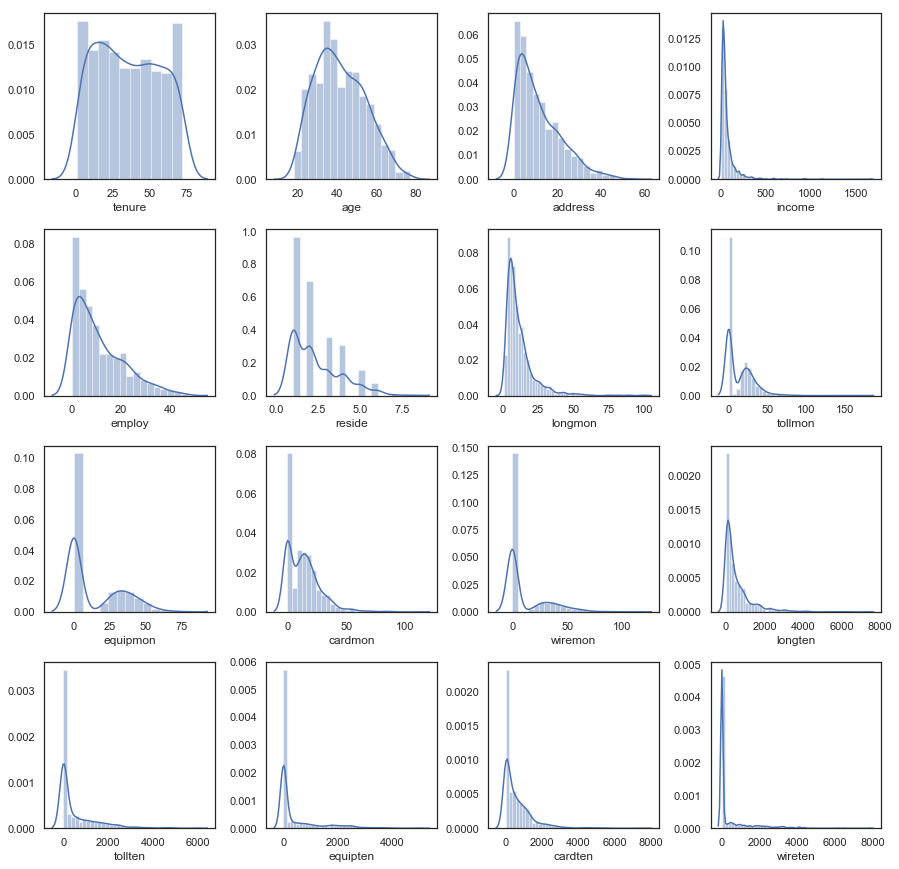

In [159]:
# list of categorical vraiables
all_cat = ['region', 'marital', 'retire', 'gender', 'custcat', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'churn', 'ed']

# data frame of numerical variables
data_num = data.drop(all_cat, axis = 1)
#sns.pairplot(data.drop(all_cat, axis = 1)) # pairplot is useful  however because of the number of numerical varaibales too difficult to read

# histogram of all numerical variables
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    plot = sns.distplot(data_num.iloc[:,i], ax = ax)

The distribution of most of the continous variables (except age and tenure) are skewed right. It worths to conssider logarithmizing some of them (ones without negative or 0 values such as income)

In [190]:
# list of variables with a skewed distribution
to_log = ['address', 'income', 'employ', 'reside', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 
         'longten', 'tollten', 'equipten', 'cardten', 'wireten']
# count observations with value 0
zero = ((data[to_log] == 0).sum(axis=0)).to_frame()
zero.columns = ['zero values']
zero

,zero values
address,56
income,0
employ,106
reside,0
longmon,0
tollmon,525
equipmon,614
cardmon,322
wiremon,704
longten,0


In [189]:
# count observations with a negative value
neg = ((data[to_log] < 0).sum(axis=0)).to_frame()
neg.columns = ['negative values']
neg

,negative values
address,0
income,32
employ,0
reside,0
longmon,0
tollmon,0
equipmon,0
cardmon,0
wiremon,0
longten,0


Based on the analysis above there are no negative values, nevertheless several zeros can be found. Since I have no further
information about the meaning of the different variables, a working approach is to log only the income, since I have some assumptionsregarding the behaviour of this variable.

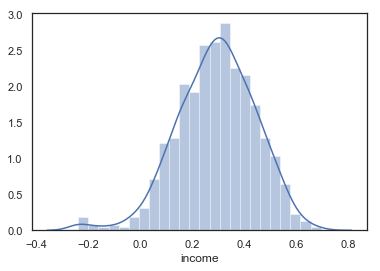

In [167]:
# transform income using natural logarithm and visualize the result
data['income'] = np.log(data['income'])
sns.distplot(data['income']);

### Categorical variables

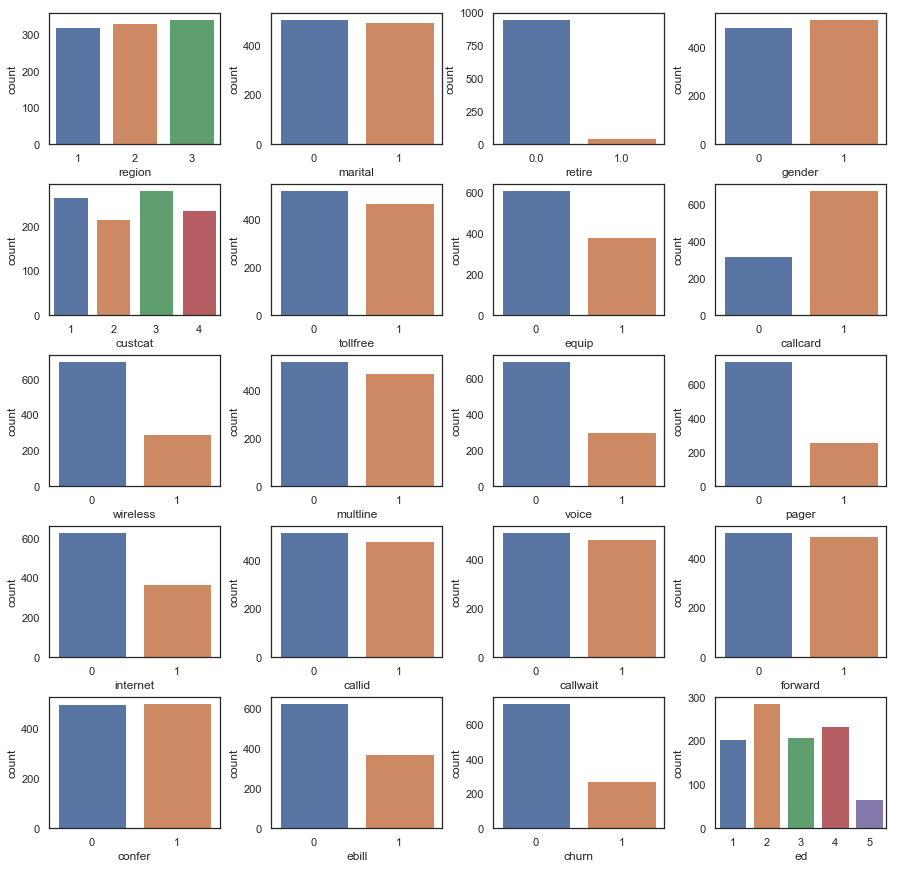

In [192]:
# bar chart of all categorical variables
fig, axes = plt.subplots(5, 4, figsize=(15, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    plot = sns.countplot(all_cat[i], data = data, ax = ax)

Note: ed (Education level most likely) is technically an ordinal variable and from teh modeling perspective dealt as a numerical
variable.

### Missing values

In [176]:
# Count NaNs in every column
missing = (len(data) - data.count()).to_frame()
missing.columns = ['missing']
missing

,missing
region,0
tenure,0
age,0
marital,0
address,0
income,0
ed,0
employ,0
retire,0
gender,0


There are no values marked as missing in the dataset, though the large number of zeros in case of some variable might repressent
some kind of missing information.

## Data preprocessing

### One Hot Encoding of categoricals

In [11]:
# check the values of the variables which are nominal according to the data description
data[['region', 'marital', 'retire', 'gender', 'custcat']].apply(pd.Series.value_counts)


,region,marital,retire,gender,custcat
0,NaN,505.0,953.0,483.0,NaN
1,322.0,495.0,47.0,517.0,266.0
2,334.0,NaN,NaN,NaN,217.0
3,344.0,NaN,NaN,NaN,281.0
4,NaN,NaN,NaN,NaN,236.0


It can be seen that marital, retire and gender are encoded as dummies similarly as flag variables.

In [194]:
# List the variables to be one hot encoded (categorical variables which are not dummies already)
# LabelEncoding is not needed since categorical variables are already encoded
# first categories are dropped since in a predictive model for a categorical variable with k categories only k-1 can be used
cat_list = ['region', 'custcat']
data_ohe = pd.get_dummies(data = data, columns = cat_list, drop_first = True)

### X/y and Train/Test split

In [228]:
# target and explanatory variables have to be stored in separate data frames according to sklearn standards
X = data_ohe.drop(['churn'], axis = 1)
y = data_ohe[['churn']]
# train/test split (with a small test sample since the main validation method will be cross-validation and the data is small)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 12)

### Handling imbalanced classes of target variable

Target variable (churn) has imbalaced classses, as shown in the EDA section. This might occur as a problem if .....

In [229]:
# Frequency table of target variable within the train set
y_train.apply(pd.Series.value_counts)

,churn
0,652
1,248


In [230]:
# Applying SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, np.ravel(y_train))

In [231]:
# Frequency table of target variable within the train set after SMOTE
new_y = pd.DataFrame(np.bincount(y_train))
new_y.columns = ['churn']
new_y

,churn
0,652
1,652


## Predictive models

### Logistic Regression

In [215]:
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(X_train, np.ravel(y_train))
logreg_pred = logreg.predict(X_test)
auc = metrics.roc_auc_score(y_test, logreg_pred)
auc
simple_logit_final_cv = cross_val_score(logreg,
                                                 X_train, np.ravel(y_train),
                                                 cv=4,
                                                 scoring='roc_auc')

In [216]:
simple_logit_final_cv 
#logreg.fit(X_train, np.ravel(y_train))

array([ 0.79739546,  0.80526177,  0.80943957,  0.84831947])